# Activation Functions

Activation functions are mathematical equations that determine the output of a neural network and introduce non-linearity into the network. This non-linearity is what allows us to model complex real-world data using neural networks. Without activation functions, we would be stuck with linear models which are simply not powerful enough to model complex real-world data such as images, speech, and videos, etc.

In this notebook, we will discuss the various activation functions, such as:
- Sigmoid 
- Tanh
- ReLU
- Leaky ReLU
- Softmax

In [1]:
# necessary imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Sigmoid

The sigmoid function is a mathematical function having a characteristic "S"-shaped curve or sigmoid curve. Often, sigmoid function refers to the special case of the logistic function shown in the first figure and defined by the formula:

$$\sigma(x) = \frac{1}{1+e^{-x}}$$

The sigmoid function is bounded between 0 and 1, and as an output, it gives us the probability of input belonging to a certain class. It is also a smooth function, which means that we can find the slope of the sigmoid curve at any two points.

Pros:
- It is non-linear
- It is continuously differentiable
- It has a fixed output range (0 to 1)

Cons:
- Vanishing gradient problem
- Outputs are not zero-centered


In [14]:
# plot function
def plot_activation_function(x, y, title):
    sns.set_style("darkgrid")
    plt.figure(figsize=(6, 3))
    sns.lineplot(x=x, y=y)
    plt.title(title)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()


In [15]:
# plot the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

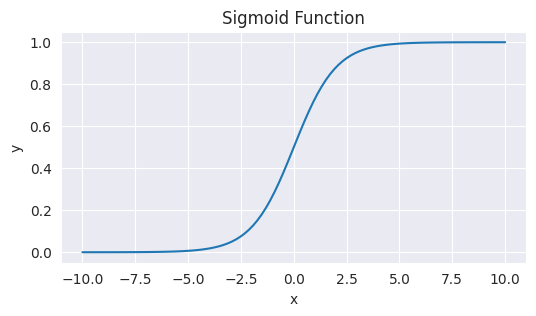

In [16]:
x = np.linspace(-10, 10, 100)
y = sigmoid(x)

plot_activation_function(x, y, "Sigmoid Function")

Detivative of sigmoid function:
$$\frac{d}{dx}\sigma(x) = \sigma(x)(1-\sigma(x))$$

#

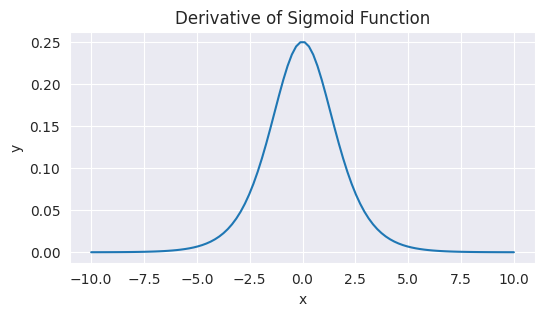

In [17]:
def derivative_sigmoid(x):
    return sigmoid(x) * (1 - sigmoid(x))

x = np.linspace(-10, 10, 100)
y = derivative_sigmoid(x)

plot_activation_function(x, y, "Derivative of Sigmoid Function")

The derivative of the sigmoid function is always between 0 and 0.25. When we use the sigmoid function as the activation function in a neural network, during backpropagation, we multiply the error term by the derivative of the sigmoid function to update the weights. If the derivative is very small, the weight updates will also be very small. This is especially problematic for deep neural networks, where we repeatedly multiply by the derivative of the sigmoid function at each layer during backpropagation. This can cause the weight updates to the first few layers to be very small, slowing down the learning process. This is called the vanishing gradient problem.

## Tanh (Hyperbolic Tangent)

The tanh function is very similar to the sigmoid function. The only difference is that it is symmetric around the origin. The range of the tanh function is from (-1 to 1). The tanh function is also smooth and non-linear like the sigmoid function.

$$tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$$

Pros:
- It is non-linear
- It is continuously differentiable
- It is zero-centered

Cons:
- Vanishing gradient problem

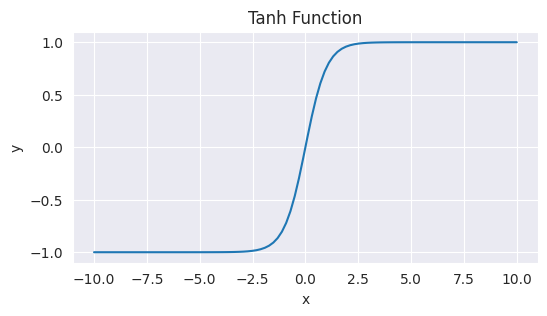

In [18]:
# plot the tanh function
def tanh(x):
    return np.tanh(x)

x = np.linspace(-10, 10, 100)
y = tanh(x)

plot_activation_function(x, y, "Tanh Function")

Derivative of tanh function:
$$\frac{d}{dx}tanh(x) = 1 - tanh^2(x)$$

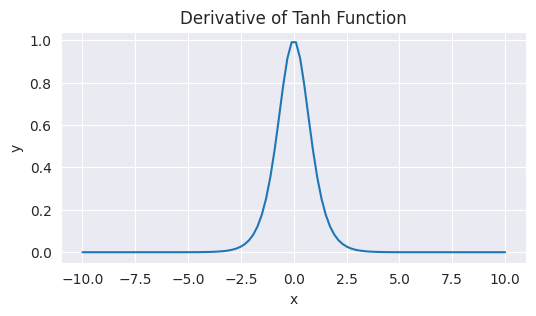

In [19]:
# plot the derivative of tanh function
def derivative_tanh(x):
    return 1 - np.tanh(x) ** 2

x = np.linspace(-10, 10, 100)
y = derivative_tanh(x)

plot_activation_function(x, y, "Derivative of Tanh Function")

The derivative of the tanh function is always between 0 and 1. This means that the weight updates during backpropagation will be larger than the weight updates during backpropagation with the sigmoid function. However, the tanh function also suffers from the vanishing gradient problem.

## ReLU (Rectified Linear Unit)

The ReLU function is the most used activation function in the world right now.Since, it is used in almost all the convolutional neural networks or deep learning.

The ReLU function is defined as:

$f(x) = max(0, x)$ 

or

$f(x) = 0$ for $x < 0$ and $f(x) = x$ for $x >= 0$
 
 The ReLU function is half rectified (from bottom). f(z) is zero when z is less than zero and f(z) is equal to z when z is above or equal to zero.

Pros:
- It is non-linear
- It is very computationally efficient. It is easier to train a ReLU network compared to sigmoidal or tanh network.
- It converges much faster than sigmoid or tanh.

Cons:
- Dying ReLU problem: When inputs approach zero or are negative, the gradient of the function becomes zero, the network cannot perform backpropagation and cannot learn. This is called the dying ReLU problem.

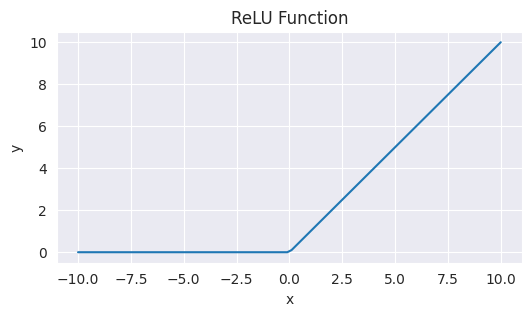

In [20]:
# plot the relu function
def relu(x):
    return np.maximum(0, x)

x = np.linspace(-10, 10, 100)
y = relu(x)

plot_activation_function(x, y, "ReLU Function")

Derivative of ReLU function:
$$\frac{d}{dx}f(x) = 0$$ for $x < 0$ and $\frac{d}{dx}f(x) = 1$ for $x >= 0$

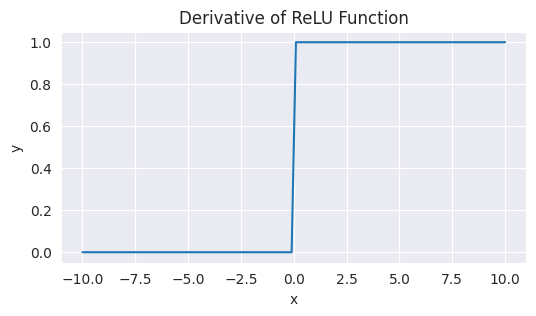

In [24]:
# plot the derivative of relu function
def derivative_relu(x):
    return np.where(x < 0, 0, 1)

x = np.linspace(-10, 10, 100)
y = derivative_relu(x)

plot_activation_function(x, y, "Derivative of ReLU Function")

ReLU function is not differentiable at x = 0. However, in practice, it works fine and has not caused any problems.

## Leaky ReLU

Leaky ReLU is an attempt to solve the dying ReLU problem. Instead of the function being zero when x < 0, a leaky ReLU will instead have a small negative slope (of 0.01, or so). That is, the function computes $f(x) = max(0.01x, x)$.

Pros:
- It does not have dying ReLU problem, since the slope for negative values is 0.01, not 0.

Cons:
- It is not zero-centered. The output of the leaky ReLU is not centered at zero, which can introduce some problems in the gradient descent operation.

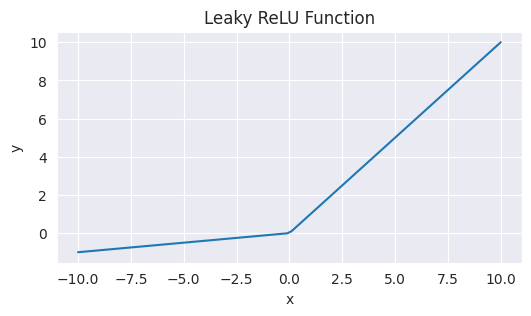

In [25]:
# plot the leaky relu function
def leaky_relu(x):
    return np.where(x < 0, 0.1 * x, x)

x = np.linspace(-10, 10, 100)
y = leaky_relu(x)

plot_activation_function(x, y, "Leaky ReLU Function")

Derivative of leaky ReLU function:
$$\frac{d}{dx}f(x) = 0.01$$ for $x < 0$ and $\frac{d}{dx}f(x) = 1$ for $x >= 0$


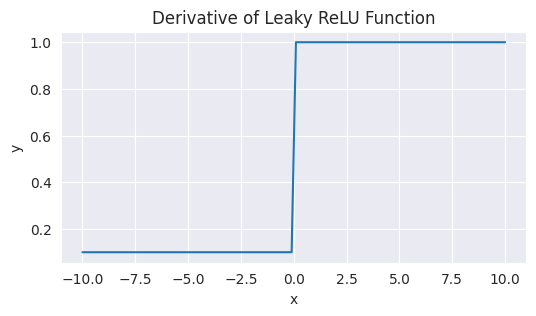

In [26]:
# plot the derivative of leaky relu function
def derivative_leaky_relu(x):
    return np.where(x < 0, 0.1, 1)

x = np.linspace(-10, 10, 100)
y = derivative_leaky_relu(x)

plot_activation_function(x, y, "Derivative of Leaky ReLU Function")

Leaky ReLU function is not differentiable at x = 0. However, in practice, it works fine and has not caused any problems.

## Softmax

The softmax function is a more generalized logistic activation function which is used for multiclass classification.

The softmax function is defined as:

$$\sigma(z)_j = \frac{e^{z_j}}{\sum_{k=1}^{K}e^{z_k}}$$

where $z$ is a vector of real numbers, $z_j$ is the $j^{th}$ element of $z$, and $K$ is the number of classes.

The softmax function outputs a vector that represents the probability distributions of a list of potential outcomes. The elements of the output vector are in range (0, 1) and sum to 1. Each element represents the probability of its corresponding class.

In [27]:
# demonstration of softmax function
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x))

# let's define a vector of 5 elements, i.e., 5 classes
x = np.array([1, 2, 3, 4, 5])
y = softmax(x)

print("Softmax Output:", y)
print("Sum of Softmax Output:", np.sum(y))

Softmax Output: [0.01165623 0.03168492 0.08612854 0.23412166 0.63640865]
Sum of Softmax Output: 1.0


Cross-entropy loss function is usually used with softmax function, and expressed as:

$$L_{CE} = -\sum_{i=1}^{N}y_i\log(\hat{y_i})$$

where $y_i$ is the true label and $\hat{y_i}$ is the predicted label.

In [38]:
# Corss-Entropy Loss
def cross_entropy(actual, predicted):
    loss = -np.sum(actual * np.log(predicted))
    return loss

# let's define a vector of 5 elements, i.e., 5 classes
# in case of mis-classification
actual = np.array([1, 0, 0, 0, 0])
predicted = np.array([0.1, 0.7, 0.1, 0.05, 0.05])

loss = cross_entropy(actual, predicted)
print("Cross-Entropy Loss:", loss)

# in case of correct classification
actual = np.array([1, 0, 0, 0, 0])
predicted = np.array([0.9, 0.04, 0.03, 0.02, 0.01])

loss = cross_entropy(actual, predicted)
print("Cross-Entropy Loss:", loss)

Cross-Entropy Loss: 2.3025850929940455
Cross-Entropy Loss: 0.10536051565782628


The problem with using the raw numbers without passing them through the softmax function is that the output values are not bound between 0 and 1 and do not sum to 1. This makes it impossible to calculate the cross-entropy loss, as for numbers smaller of equal to 0, the log function is undefined.